In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/tobiasbueck/multilingual-customer-support-tickets?select=helpdesk_customer_tickets.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pooja160904
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tobiasbueck/multilingual-customer-support-tickets


100%|██████████| 1.10M/1.10M [00:00<00:00, 109MB/s]

In [ ]:
df = pd.read_csv("/content/multilingual-customer-support-tickets/helpdesk_customer_multi_lang_tickets.csv")
df.head(10)

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\nThank you for reaching out reg...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,NaN,NaN,NaN
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\nich hoffe,...","Sehr geehrter <name>,\n\nvielen Dank für Ihre ...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,NaN,NaN,NaN
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\nEstou enfrentando ...","Caro <name>,\n\nObrigado por entrar em contato...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out and...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,NaN,NaN,NaN,NaN
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\nWe are ...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,NaN,NaN,NaN
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\nI a...","Hello <name>,\n\nWe appreciate you informing u...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,NaN,NaN,NaN
8,1030547538129,Urgent Assistance Needed,"Hello Support Team,\n\nI am reaching out to ur...","Dear <name>,\n\nWe appreciate you reaching out...",Request,IT Support,high,en,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Customer Service,Technical Guidance,NaN,NaN,NaN
9,1033012757171,Anmeldeprobleme mit Microsoft Surface Pro 7,"Sehr geehrter Tech Online Store Support,\n\nIc...","Sehr geehrter <name>,\n\nVielen Dank, dass Sie...",Problem,Technical Support,high,de,Tech Online Store,Login Issue,Technical Support,Product Support,Warranty Claim,Technical Guidance,Problem Resolution,NaN,NaN,NaN


In [ ]:
#subject: Brief summary of the ticket issue.
#body: Detailed description of the customer's problem.
#answer: Respond given by the helpdesk team.
#type: Type of ticket (e.g., Incident, Request, Problem).
#queue: The team or department responsible (e.g., Technical Support, Sales).
#priority: Urgency level (e.g., high, medium, low).
#language: Language in which the ticket is written (e.g., English, German).
#tags: Various tags associated with the ticket, describing key issues or contexts.

In [ ]:
df.shape

(1566, 18)

In [ ]:
# to get all unique values of all tags
tag_all = [x for x in df.columns if 'tag' in x]

tag_total = pd.concat([df[x] for x in tag_all])

unique_tag = tag_total.unique()

unique_tag,len(unique_tag)

(array(['Service Outage', 'Technical Support', 'Data Breach',
        'Customer Service', 'Returns and Exchanges', 'Login Issue',
        'Software Bug', 'Billing Issue', 'IT Support', 'Urgent Issue',
        'Product Support', 'Service Disruption', 'Network Issue',
        'Hardware Failure', 'General Inquiry', 'System Maintenance',
        'Sales Inquiry', 'Password Reset', 'Feature Request',
        'Performance Tuning', 'Technical Guidance', 'Critical Failure',
        'Service Maintenance', 'Consultoría Informática',
        'Consultation Request', 'Backup Restore', 'Product Replacement',
        'Customer Feedback', 'Refund Request', 'Incident Report',
        'Service Notification', 'Payment Processing', 'Cost Optimization',
        'Cloud Services', 'Account Assistance', 'System Crash',
        'Problem Resolution', 'Email Configuration', 'Warranty Claim',
        'Service Recovery', 'Email Support', 'Consulting Services',
        'Wireless Setup', 'Order Issue', 'Printer Setup

In [ ]:
df["language"].value_counts()

,count
language,
de,397
es,379
en,339
pt,229
fr,222


In [ ]:
#1st Finding

In [ ]:
#the language percentage
language_counts = df['language'].value_counts()

total_count = df.shape[0]

language_percentage = (language_counts / total_count) * 100

language_percentage

,count
language,
de,25.351213
es,24.201788
en,21.647510
pt,14.623244
fr,14.176245


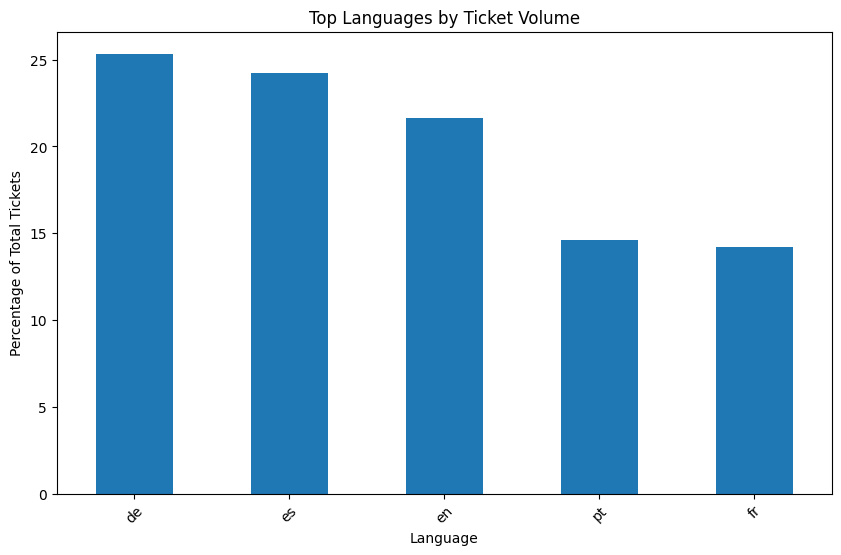

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_languages.plot(kind='bar')
plt.title('Top Languages by Ticket Volume')
plt.xlabel('Language')
plt.ylabel('Percentage of Total Tickets')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df["type"].value_counts()

,count
type,
Incident,663
Request,468
Problem,292
Change,143


In [ ]:
df["priority"].value_counts()

,count
priority,
high,788
medium,572
low,206


In [ ]:
# 2nd finding
df['priority'].value_counts() / df.shape[0] * 100

,count
priority,
high,50.319285
medium,36.526181
low,13.154534


In [ ]:
df["queue"].value_counts()

,count
queue,
Technical Support,589
Product Support,288
Customer Service,234
IT Support,179
Billing and Payments,117
Sales and Pre-Sales,49
Returns and Exchanges,44
Service Outages and Maintenance,44
General Inquiry,13


In [ ]:
# 3rd finding
df['queue'].value_counts() / df.shape[0] * 100

,count
queue,
Technical Support,37.611750
Product Support,18.390805
Customer Service,14.942529
IT Support,11.430396
Billing and Payments,7.471264
Sales and Pre-Sales,3.128991
Returns and Exchanges,2.809706
Service Outages and Maintenance,2.809706
General Inquiry,0.830140


In [ ]:
#to get "priiority" value counts for "type" == "incident"
df.loc[df["type"].eq("Incident"), "priority"].value_counts()

,count
priority,
high,378
medium,228
low,57


In [ ]:
df.loc[df["type"].eq("Problem"), "priority"].value_counts()

,count
priority,
high,158
medium,101
low,33


In [ ]:
# to find all the rows in which any tag is urgent issue
urgent_tickets = df.loc[
    df.iloc[:, 9:18].apply(lambda row: row.str.contains("urgent issue", case=False, na=False).any(), axis=1),
]

urgent_tickets


,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\nThank you for reaching out reg...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,NaN,NaN,NaN
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\nEstou enfrentando ...","Caro <name>,\n\nObrigado por entrar em contato...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\nI a...","Hello <name>,\n\nWe appreciate you informing u...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,9930811597569,Crítico: Aplazamiento en la Implementación del...,"Saludos Soporte al Cliente, \n\nActualmente es...","Estimado <name>,\n\nAgradecemos su mensaje. Re...",Incident,Customer Service,high,es,IT Consulting Firm,Critical Failure,Service Disruption,Urgent Issue,Technical Support,NaN,NaN,NaN,NaN,NaN
1555,9939737054049,Gmail-Synchronisierungsproblem,"Sehr geehrter Kundenservice,\n\nIch hoffe, die...","Lieber <name>,\n\nVielen Dank, dass Sie uns be...",Incident,Technical Support,medium,de,IT Services,Technical Support,Service Disruption,Urgent Issue,Problem Resolution,Software Bug,Customer Service,NaN,NaN,NaN
1556,9942016791631,Kritisches Problem mit der Serververwaltung,"Sehr geehrtes IT Consulting Firm Support Team,...","Lieber <name>,\n\nwir danken Ihnen, dass Sie u...",Incident,Technical Support,high,de,IT Consulting Firm,Urgent Issue,IT Support,Service Disruption,System Crash,Technical Guidance,Problem Resolution,NaN,NaN,NaN
1559,9968887076096,Demande d'assistance pour une erreur d'install...,"Cher service clientèle,\n\nJe rencontre une er...","Cher <name>,\n\nMerci de nous avoir contacté c...",Problem,Technical Support,medium,fr,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN


In [ ]:
# to determine priority where any of the tags is urgent issue
urgent_tickets_count = df.loc[
    df.iloc[:, 9:18].apply(lambda row: row.str.contains("urgent issue", case=False, na=False).any(), axis=1),'priority'
].value_counts()

urgent_tickets_count

,count
priority,
high,608
medium,211
low,23


In [ ]:
#Issue_1 - 'Urgent Issue' marked as low priority

In [ ]:
df['business_type'].value_counts()

,count
business_type,
IT Services,748
Tech Online Store,528
IT Consulting Firm,189
Software Development Company,98
IT Consulting Service,3


In [ ]:
bus_count = df['business_type'].value_counts()
bus_count / df.shape[0] * 100

,count
business_type,
IT Services,47.765006
Tech Online Store,33.716475
IT Consulting Firm,12.068966
Software Development Company,6.257982
IT Consulting Service,0.191571


In [ ]:
df.loc[df["priority"].eq("high"), "queue"].value_counts()

,count
queue,
Technical Support,403
Product Support,119
IT Support,115
Customer Service,84
Service Outages and Maintenance,39
Billing and Payments,23
Returns and Exchanges,5


In [ ]:
df.isnull().sum() #missing values

,0
id,0
subject,1
body,1
answer,0
type,0
queue,0
priority,0
language,0
business_type,0
tag_1,0


In [ ]:
df[df['subject'].isnull()]

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
15,1054017675496,NaN,"Hola Soporte al Cliente, estoy escribiendo par...","Estimado/a <name>,\n\nGracias por contactarnos...",Change,IT Support,medium,es,IT Services,Customer Service,Technical Support,Product Support,General Inquiry,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df['body'].isnull()]

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
214,1754943088822,Google Workspace,NaN,"Of course, what help do you need with Google W...",Request,Product Support,high,en,Software Development Company,Technical Support,Product Support,General Inquiry,Account Assistance,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Issue2 - priority high even body not given

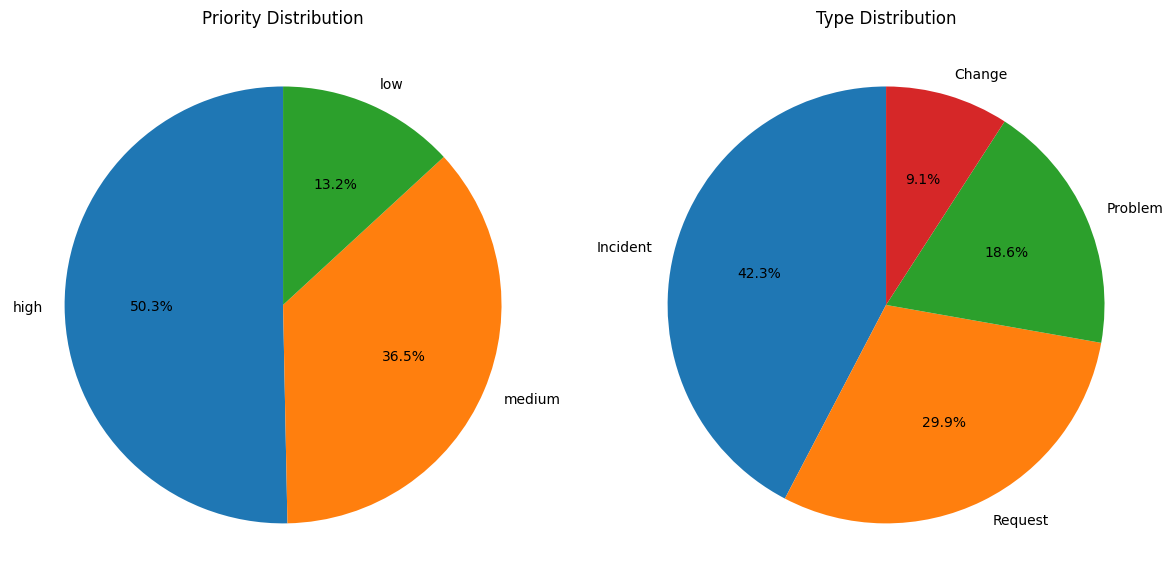

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
priority_counts = df['priority'].value_counts()
ax[0].pie(priority_counts, labels=priority_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Priority Distribution')

type_counts = df['type'].value_counts()
ax[1].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Type Distribution')

plt.tight_layout()
plt.show()

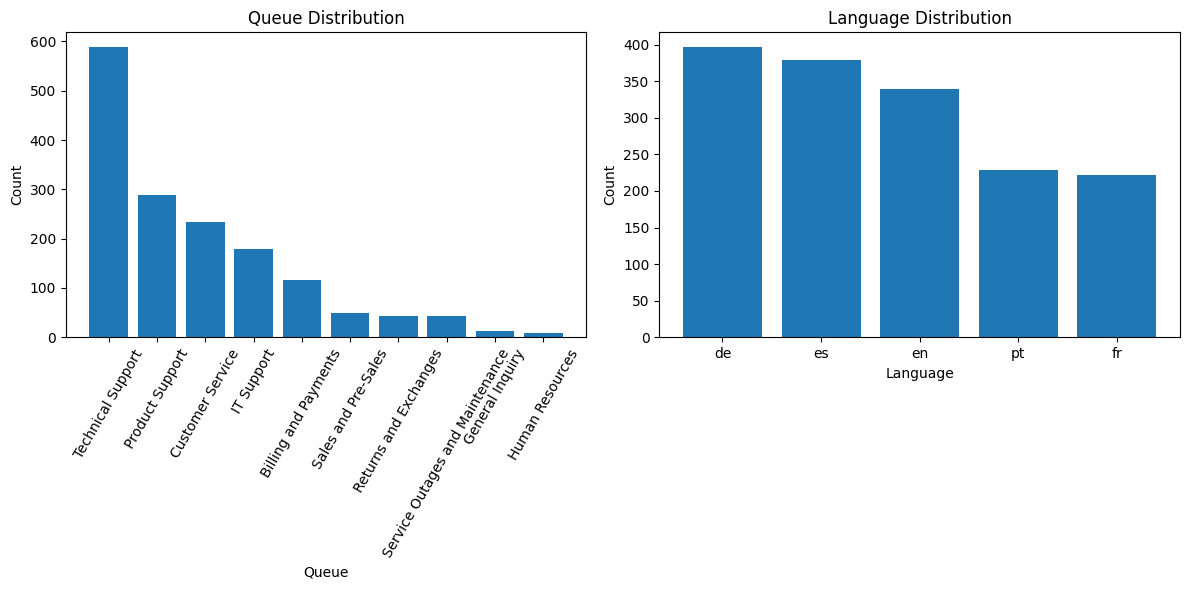

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar graph for 'queue'
queue_counts = df['queue'].value_counts()
ax[0].bar(queue_counts.index, queue_counts.values)
ax[0].set_title('Queue Distribution')
ax[0].set_xlabel('Queue')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x',rotation = 60)

# Bar graph for 'language'
language_counts = df['language'].value_counts()
ax[1].bar(language_counts.index, language_counts.values)
ax[1].set_title('Language Distribution')
ax[1].set_xlabel('Language')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

type                             Change  Incident  Problem  Request
queue                                                              
Billing and Payments                  5        43       24       45
Customer Service                      5        65       39      125
General Inquiry                       0         8        0        5
Human Resources                       0         4        5        0
IT Support                           27        79       26       47
Product Support                      47       116       51       74
Returns and Exchanges                11         3        6       24
Sales and Pre-Sales                   0        10        9       30
Service Outages and Maintenance       5        33        0        6
Technical Support                    43       302      132      112


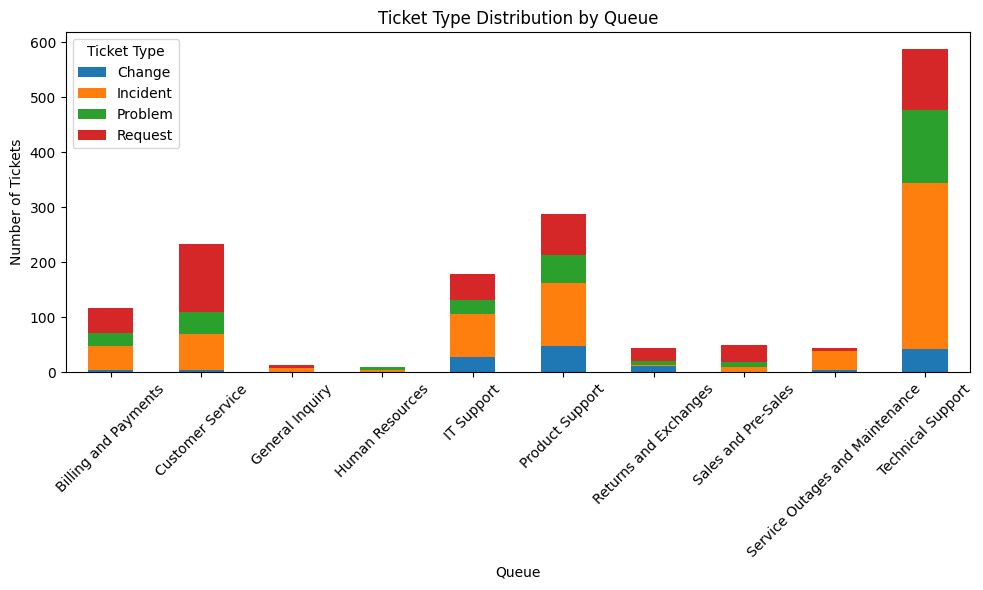

type                               Change  Incident   Problem   Request
queue                                                                  
Billing and Payments             0.042735  0.367521  0.205128  0.384615
Customer Service                 0.021368  0.277778  0.166667  0.534188
General Inquiry                  0.000000  0.615385  0.000000  0.384615
Human Resources                  0.000000  0.444444  0.555556  0.000000
IT Support                       0.150838  0.441341  0.145251  0.262570
Product Support                  0.163194  0.402778  0.177083  0.256944
Returns and Exchanges            0.250000  0.068182  0.136364  0.545455
Sales and Pre-Sales              0.000000  0.204082  0.183673  0.612245
Service Outages and Maintenance  0.113636  0.750000  0.000000  0.136364
Technical Support                0.073005  0.512733  0.224109  0.190153

Queues with >60% Incident tickets:


type,Change,Incident,Problem,Request
queue,,,,
General Inquiry,0.000000,0.615385,0.0,0.384615
Service Outages and Maintenance,0.113636,0.750000,0.0,0.136364


In [ ]:
# Group by 'queue' and 'type' to analyze recurring patterns
queue_type_counts = df.groupby(['queue', 'type']).size().unstack(fill_value=0)

print(queue_type_counts)

#Visualize the distribution of ticket types within each queue
queue_type_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Ticket Type Distribution by Queue')
plt.xlabel('Queue')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.legend(title='Ticket Type')
plt.tight_layout()
plt.show()

queue_type_proportions = queue_type_counts.div(queue_type_counts.sum(axis=1), axis=0)
print(queue_type_proportions)

high_incident_queues = queue_type_proportions[queue_type_proportions['Incident'] > 0.6]
print("\nQueues with >60% Incident tickets:")
high_incident_queues

In [ ]:
#automation
#1st - in queue if we have technical support or product suppoort with Urgent issue in any tags should have high priority

In [ ]:
def assign_high_priority(df):
  """
  Assigns high priority to tickets in 'Technical Support' or 'Product Support' queues
  that have 'urgent issue' in any of their tags.

  Args:
    df: The input DataFrame.

  Returns:
    A new DataFrame with updated priorities.
  """
  # Creating a copy
  df_updated = df.copy()

  urgent_tickets_mask = (
      (df_updated['queue'] == 'Technical Support') | (df_updated['queue'] == 'Product Support')
  ) & (
      df_updated.iloc[:, 9:18].apply(lambda row: row.str.contains("urgent issue", case=False, na=False).any(), axis=1)
  )

  df_updated.loc[urgent_tickets_mask, 'priority'] = 'high'

  return df_updated

In [ ]:
df_updated = assign_high_priority(df)
df_updated

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\nThank you for reaching out reg...",Incident,Product Support,high,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,NaN,NaN,NaN
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\nich hoffe,...","Sehr geehrter <name>,\n\nvielen Dank für Ihre ...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,NaN,NaN,NaN
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\nEstou enfrentando ...","Caro <name>,\n\nObrigado por entrar em contato...",Problem,Technical Support,high,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,9974052734733,Immediate Assistance Requested,"Dear Customer Support Team,\n\nI am contacting...",Subject: Re: Immediate Assistance Requested\n\...,Request,Technical Support,high,en,IT Consulting Firm,IT Support,Urgent Issue,Network Issue,Problem Resolution,Technical Guidance,Service Recovery,Performance Tuning,NaN,NaN
1562,9976062913094,Demande de consultation de serveur,"Cher support client,\n\nJe vous écris pour dem...","Cher <name>,\n\nMerci de nous avoir contactés....",Request,Customer Service,medium,fr,IT Services,IT Support,Technical Support,System Maintenance,Software Bug,Technical Guidance,NaN,NaN,NaN,NaN
1563,9980051846510,Solicitação de Troca de Impressora,"Caro Suporte da Loja Online Tech,\n\nEstou enf...","Caro <name>,\n\nObrigado por entrar em contato...",Request,Returns and Exchanges,medium,pt,Tech Online Store,Returns and Exchanges,Product Support,Warranty Claim,Order Issue,Service Recovery,NaN,NaN,NaN,NaN
1564,9982406203212,Problèmes de facturation concernant les servic...,"Cher Service Client,\n\nJe vous écris pour por...","Cher <name>,\n\nMerci de nous avoir contactés ...",Problem,Billing and Payments,high,fr,IT Services,Billing Issue,Customer Service,Account Assistance,Problem Resolution,NaN,NaN,NaN,NaN,NaN


In [ ]:
#2nd -   if body or subject not found col in any row, the answer should be missing information

In [ ]:
def fill_missing_info(df):
    """
    Fills the 'answer' column with 'missing information' for rows with missing 'body' or 'subject'.

    Args:
      df: The input DataFrame.

    Returns:
      A new DataFrame with updated 'answer' column.
    """
    df_updated = df.copy()
    missing_mask = df_updated['body'].isnull() | df_updated['subject'].isnull()
    df_updated.loc[missing_mask, 'answer'] = 'missing information'
    return df_updated

df_updated = fill_missing_info(df_updated)
df_updated

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\nThank you for reaching out reg...",Incident,Product Support,high,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,NaN,NaN,NaN
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\nich hoffe,...","Sehr geehrter <name>,\n\nvielen Dank für Ihre ...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,NaN,NaN,NaN
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\nEstou enfrentando ...","Caro <name>,\n\nObrigado por entrar em contato...",Problem,Technical Support,high,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,9974052734733,Immediate Assistance Requested,"Dear Customer Support Team,\n\nI am contacting...",Subject: Re: Immediate Assistance Requested\n\...,Request,Technical Support,high,en,IT Consulting Firm,IT Support,Urgent Issue,Network Issue,Problem Resolution,Technical Guidance,Service Recovery,Performance Tuning,NaN,NaN
1562,9976062913094,Demande de consultation de serveur,"Cher support client,\n\nJe vous écris pour dem...","Cher <name>,\n\nMerci de nous avoir contactés....",Request,Customer Service,medium,fr,IT Services,IT Support,Technical Support,System Maintenance,Software Bug,Technical Guidance,NaN,NaN,NaN,NaN
1563,9980051846510,Solicitação de Troca de Impressora,"Caro Suporte da Loja Online Tech,\n\nEstou enf...","Caro <name>,\n\nObrigado por entrar em contato...",Request,Returns and Exchanges,medium,pt,Tech Online Store,Returns and Exchanges,Product Support,Warranty Claim,Order Issue,Service Recovery,NaN,NaN,NaN,NaN
1564,9982406203212,Problèmes de facturation concernant les servic...,"Cher Service Client,\n\nJe vous écris pour por...","Cher <name>,\n\nMerci de nous avoir contactés ...",Problem,Billing and Payments,high,fr,IT Services,Billing Issue,Customer Service,Account Assistance,Problem Resolution,NaN,NaN,NaN,NaN,NaN


In [ ]:
missing_answer_rows = df_updated[df_updated['answer'] == 'missing information']
missing_answer_rows

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
15,1054017675496,NaN,"Hola Soporte al Cliente, estoy escribiendo par...",missing information,Change,IT Support,medium,es,IT Services,Customer Service,Technical Support,Product Support,General Inquiry,NaN,NaN,NaN,NaN,NaN
214,1754943088822,Google Workspace,NaN,missing information,Request,Product Support,high,en,Software Development Company,Technical Support,Product Support,General Inquiry,Account Assistance,NaN,NaN,NaN,NaN,NaN
